In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings("ignore") #all warnings are filter out


## IPL 2022 Capstone Project

### The Indian Premier League (IPL) is a professional T20 cricket league in India, featuring franchises representing cities. This project explores IPL 2022 match-level data to derive meaningful insights and understand match outcomes, player performances, and team dynamics.

#### These are some of the important columns that we'll focus on for meaningful insights in this project.

#### column names: Variable Type
 - date : string
- venue : string
- stage : string
- team1 : string
- team2 : string
- toss_winner : string
- toss_decision : string
- first_ings_score : integer
- second_ings_score : integer
- match_winner : string
- won_by : string
- margin : integer
- player_of_the_match : string
- top_scorer : string
- highscore : integer
- best_bowling : string
- best_bowling_fgure : string
- gure : string

### Loading of dataset

In [2]:
ipl=pd.read_csv("IPL.csv")
ipl.head(5)

,match_id,date,venue,team1,team2,stage,toss_winner,toss_decision,first_ings_score,first_ings_wkts,second_ings_score,second_ings_wkts,match_winner,won_by,margin,player_of_the_match,top_scorer,highscore,best_bowling,best_bowling_figure
0,1,"March 26,2022","Wankhede Stadium, Mumbai",Chennai,Kolkata,Group,Kolkata,Field,131,5,133,4,Kolkata,Wickets,6,Umesh Yadav,MS Dhoni,50,Dwayne Bravo,3--20
1,2,"March 27,2022","Brabourne Stadium, Mumbai",Delhi,Mumbai,Group,Delhi,Field,177,5,179,6,Delhi,Wickets,4,Kuldeep Yadav,Ishan Kishan,81,Kuldeep Yadav,3--18
2,3,"March 27,2022","Dr DY Patil Sports Academy, Mumbai",Banglore,Punjab,Group,Punjab,Field,205,2,208,5,Punjab,Wickets,5,Odean Smith,Faf du Plessis,88,Mohammed Siraj,2--59
3,4,"March 28,2022","Wankhede Stadium, Mumbai",Gujarat,Lucknow,Group,Gujarat,Field,158,6,161,5,Gujarat,Wickets,5,Mohammed Shami,Deepak Hooda,55,Mohammed Shami,3--25
4,5,"March 29,2022","Maharashtra Cricket Association Stadium,Pune",Hyderabad,Rajasthan,Group,Hyderabad,Field,210,6,149,7,Rajasthan,Runs,61,Sanju Samson,Aiden Markram,57,Yuzvendra Chahal,3--22


### Basic Information 

In [3]:
ipl.describe()

,match_id,first_ings_score,first_ings_wkts,second_ings_score,second_ings_wkts,margin,highscore
count,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000
mean,37.500000,171.121622,6.135135,158.540541,6.175676,16.972973,71.716216
std,21.505813,29.048355,2.222699,29.299207,2.639832,19.651047,20.705052
min,1.000000,68.000000,0.000000,72.000000,1.000000,2.000000,28.000000
25%,19.250000,154.250000,5.000000,142.750000,4.000000,5.250000,57.000000
50%,37.500000,169.500000,6.000000,160.000000,6.000000,8.000000,68.000000
75%,55.750000,192.750000,8.000000,176.000000,8.000000,18.000000,87.750000
max,74.000000,222.000000,10.000000,211.000000,10.000000,91.000000,140.000000


In [4]:
ipl.shape

(74, 20)

In [5]:
ipl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74 entries, 0 to 73
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   match_id             74 non-null     int64 
 1   date                 74 non-null     object
 2   venue                74 non-null     object
 3   team1                74 non-null     object
 4   team2                74 non-null     object
 5   stage                74 non-null     object
 6   toss_winner          74 non-null     object
 7   toss_decision        74 non-null     object
 8   first_ings_score     74 non-null     int64 
 9   first_ings_wkts      74 non-null     int64 
 10  second_ings_score    74 non-null     int64 
 11  second_ings_wkts     74 non-null     int64 
 12  match_winner         74 non-null     object
 13  won_by               74 non-null     object
 14  margin               74 non-null     int64 
 15  player_of_the_match  74 non-null     object
 16  top_scorer

### Matches btw chennai and mumbai

In [6]:
mumbai_chennai_ipl_mat=ipl[((ipl['team1'] == 'Chennai') & (ipl['team2'] == 'Mumbai')) | ((ipl['team1'] == 'Mumbai') & (ipl['team2'] == 'Chennai')) ]
mumbai_chennai_ipl_mat

,match_id,date,venue,team1,team2,stage,toss_winner,toss_decision,first_ings_score,first_ings_wkts,second_ings_score,second_ings_wkts,match_winner,won_by,margin,player_of_the_match,top_scorer,highscore,best_bowling,best_bowling_figure
32,33,"April 21,2022","Dr DY Patil Sports Academy, Mumbai",Chennai,Mumbai,Group,Chennai,Field,155,7,156,7,Chennai,Wickets,3,Mukesh Choudhary,Tilak Varma,51,Daniel Sams,4--30
58,59,"May 12,2022","Wankhede Stadium, Mumbai",Chennai,Mumbai,Group,Mumbai,Field,97,10,103,5,Mumbai,Wickets,5,Daniel Sams,MS Dhoni,36,Daniel Sams,3--16


### Max Numbers of matches

In [7]:
team1=ipl['team1'].value_counts()
team2=ipl['team2'].value_counts()
total_matches=team1.add(team2,fill_value=0)
total_matches

Banglore     16.0
Chennai      14.0
Delhi        14.0
Gujarat      16.0
Hyderabad    14.0
Kolkata      14.0
Lucknow      15.0
Mumbai       14.0
Punjab       14.0
Rajasthan    17.0
Name: count, dtype: float64

<Axes: xlabel='count', ylabel='Count'>

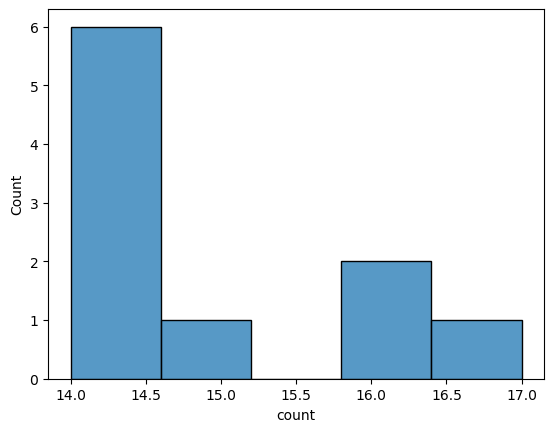

In [8]:
sns.histplot(total_matches)


In [9]:
total_matches.idxmax()

'Rajasthan'

In [10]:
total_matches.max()

17.0

### Maximum Match Winners

<Axes: title={'center': 'Match Winners'}, xlabel='match_winner', ylabel='Count'>

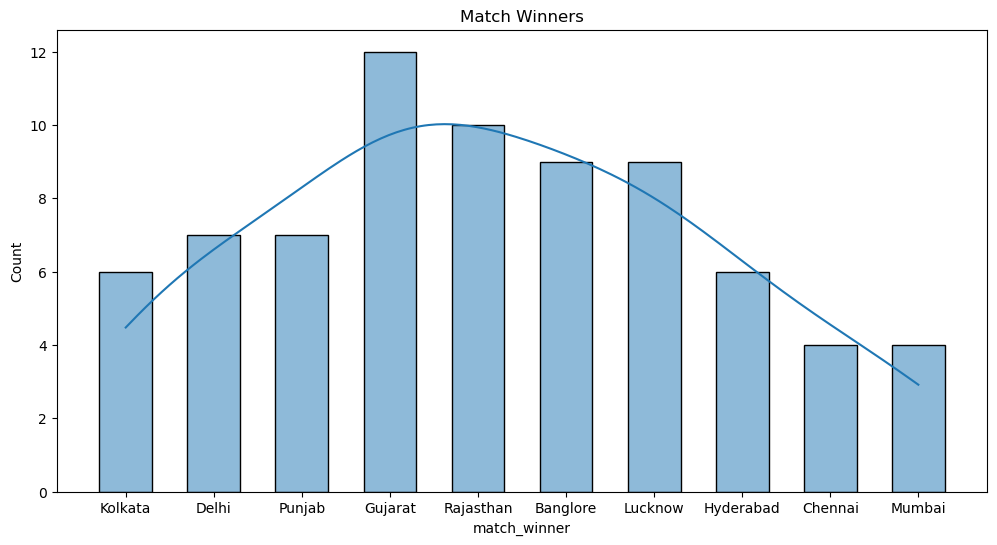

In [11]:
plt.figure(figsize=(12, 6)) 
plt.title("Match Winners")
sns.histplot(ipl['match_winner'],kde=True,shrink=0.6)

In [12]:
match_winner=ipl['match_winner'].value_counts().idxmax()
match_winner

'Gujarat'

### Checking for any null

In [13]:
ipl.isnull().sum()

match_id               0
date                   0
venue                  0
team1                  0
team2                  0
stage                  0
toss_winner            0
toss_decision          0
first_ings_score       0
first_ings_wkts        0
second_ings_score      0
second_ings_wkts       0
match_winner           0
won_by                 0
margin                 0
player_of_the_match    0
top_scorer             0
highscore              0
best_bowling           0
best_bowling_figure    0
dtype: int64

### Match winners vs Toss Winners

<Axes: title={'center': 'Match Winners vs toss winners'}, xlabel='Match Winners', ylabel='toss Winners'>

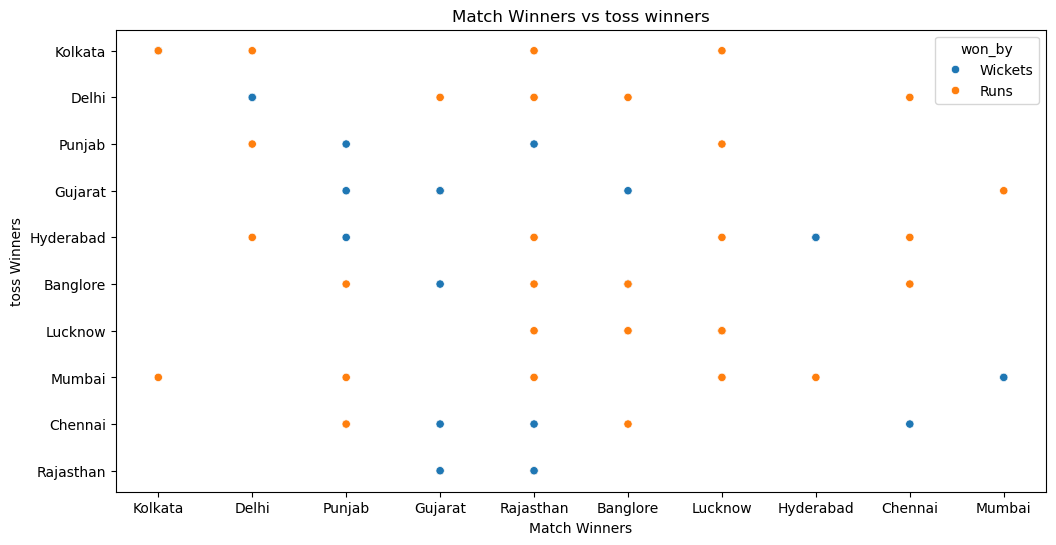

In [14]:
plt.figure(figsize=(12, 6)) 
plt.title("Match Winners vs toss winners")
plt.xlabel("Match Winners")
plt.ylabel("toss Winners")
sns.scatterplot(data=ipl, x="match_winner", y="toss_winner", hue="won_by")

In [15]:
count=ipl[ipl['toss_winner'] == ipl['match_winner']]['match_id'].count()
percentage=(count*100)/ipl.shape[0]
percentage

np.float64(48.648648648648646)

### Highest score by each team


In [16]:
high_score=ipl[['team1','highscore']]
high_score

,team1,highscore
0,Chennai,50
1,Delhi,81
2,Banglore,88
3,Gujarat,55
4,Hyderabad,57
...,...,...
69,Hyderabad,49
70,Gujarat,89
71,Banglore,112
72,Banglore,106


<Axes: title={'center': 'Top High score of each team'}, xlabel='team1', ylabel='highscore'>

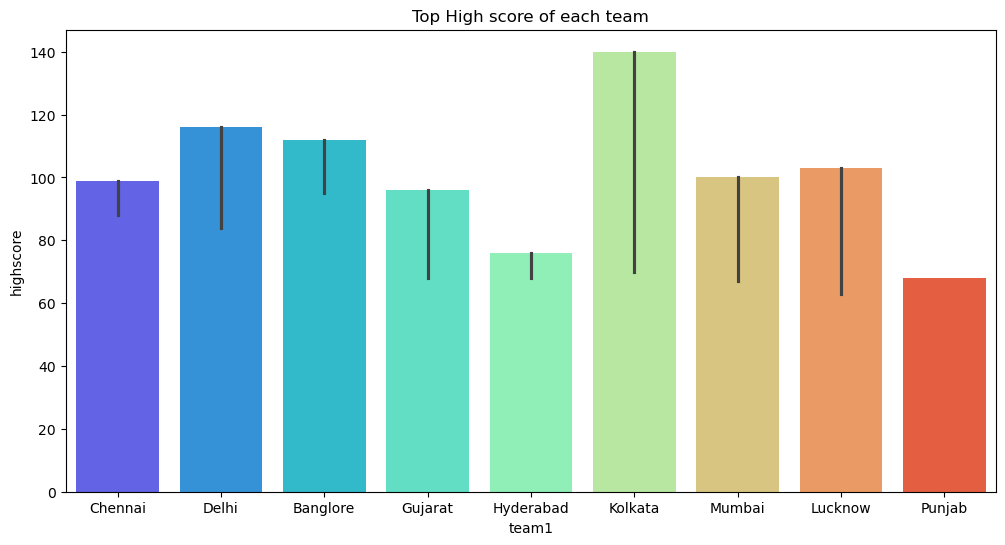

In [17]:
plt.figure(figsize=(12, 6)) 
plt.title('Top High score of each team')
sns.barplot(x='team1',y='highscore', data=high_score,estimator=np.max,palette='rainbow')

In [18]:
ipl[ipl['team1'] == 'Mumbai']['highscore'].max()

100

### Winner of IPL

In [19]:
winner=ipl['match_winner'].value_counts()
winner

match_winner
Gujarat      12
Rajasthan    10
Banglore      9
Lucknow       9
Punjab        7
Delhi         7
Kolkata       6
Hyderabad     6
Chennai       4
Mumbai        4
Name: count, dtype: int64

<Axes: title={'center': 'Match Winners'}, xlabel='match_winner'>

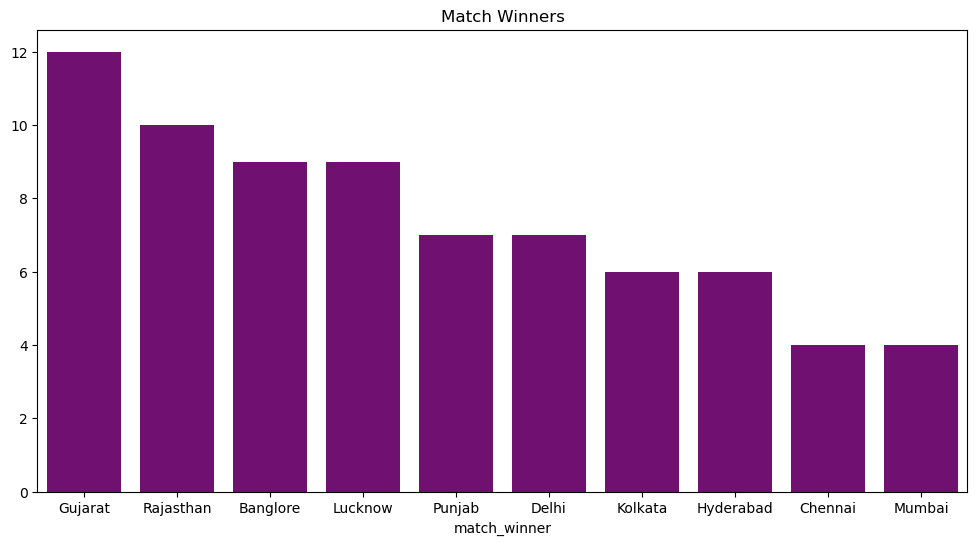

In [20]:
plt.figure(figsize=(12, 6)) 
plt.title("Match Winners")
sns.barplot(x=winner.index,y=winner.values,color='purple')

In [21]:
winner.idxmax()

'Gujarat'

### toss decision trends

<Axes: xlabel='toss_decision', ylabel='count'>

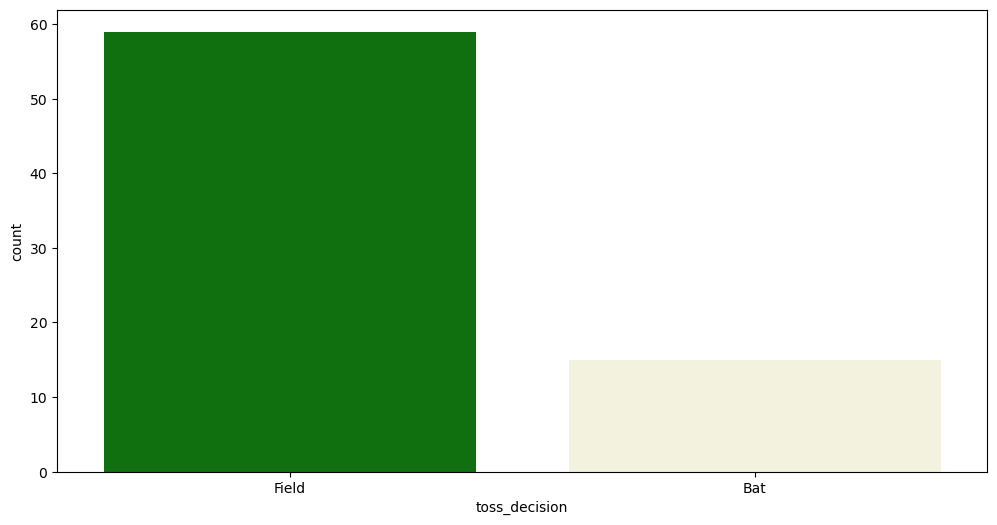

In [22]:
plt.figure(figsize=(12, 6)) 
sns.countplot(x=ipl['toss_decision'],palette=['green','beige'])

### team_wins runs vs wickets  

<Axes: xlabel='won_by', ylabel='count'>

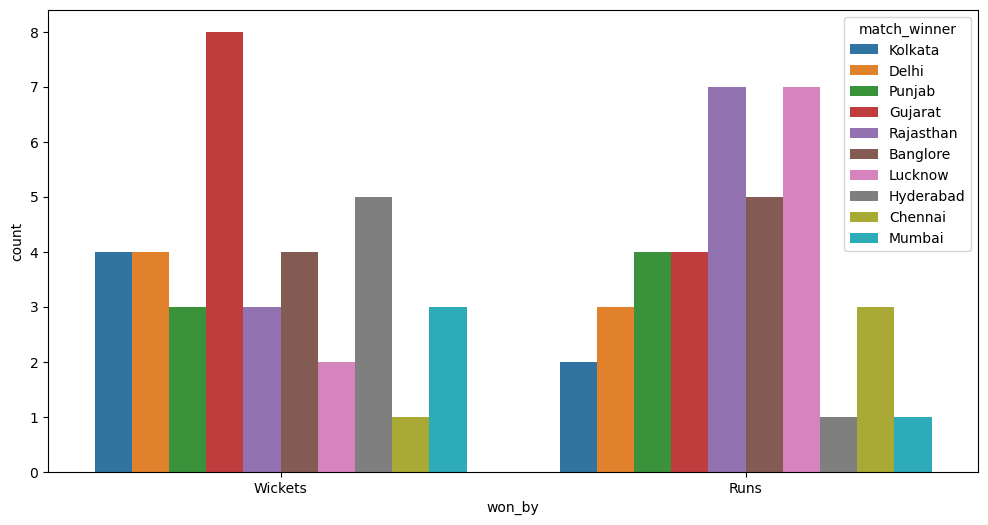

In [23]:
plt.figure(figsize=(12, 6)) 
sns.countplot(x=ipl['won_by'],hue=ipl['match_winner'])

In [25]:
won=ipl[['match_winner','won_by']]
won_by_wickets=won[won['won_by']=='Wickets']
won_by_runs=won[won['won_by']=='Runs']


In [26]:
won_by_runs.value_counts()

match_winner  won_by
Lucknow       Runs      7
Rajasthan     Runs      7
Banglore      Runs      5
Gujarat       Runs      4
Punjab        Runs      4
Chennai       Runs      3
Delhi         Runs      3
Kolkata       Runs      2
Hyderabad     Runs      1
Mumbai        Runs      1
Name: count, dtype: int64

In [27]:
won_by_wickets.value_counts()

match_winner  won_by 
Gujarat       Wickets    8
Hyderabad     Wickets    5
Delhi         Wickets    4
Banglore      Wickets    4
Kolkata       Wickets    4
Mumbai        Wickets    3
Rajasthan     Wickets    3
Punjab        Wickets    3
Lucknow       Wickets    2
Chennai       Wickets    1
Name: count, dtype: int64

## Player of the match

In [28]:
ipl.head(5)

,match_id,date,venue,team1,team2,stage,toss_winner,toss_decision,first_ings_score,first_ings_wkts,second_ings_score,second_ings_wkts,match_winner,won_by,margin,player_of_the_match,top_scorer,highscore,best_bowling,best_bowling_figure
0,1,"March 26,2022","Wankhede Stadium, Mumbai",Chennai,Kolkata,Group,Kolkata,Field,131,5,133,4,Kolkata,Wickets,6,Umesh Yadav,MS Dhoni,50,Dwayne Bravo,3--20
1,2,"March 27,2022","Brabourne Stadium, Mumbai",Delhi,Mumbai,Group,Delhi,Field,177,5,179,6,Delhi,Wickets,4,Kuldeep Yadav,Ishan Kishan,81,Kuldeep Yadav,3--18
2,3,"March 27,2022","Dr DY Patil Sports Academy, Mumbai",Banglore,Punjab,Group,Punjab,Field,205,2,208,5,Punjab,Wickets,5,Odean Smith,Faf du Plessis,88,Mohammed Siraj,2--59
3,4,"March 28,2022","Wankhede Stadium, Mumbai",Gujarat,Lucknow,Group,Gujarat,Field,158,6,161,5,Gujarat,Wickets,5,Mohammed Shami,Deepak Hooda,55,Mohammed Shami,3--25
4,5,"March 29,2022","Maharashtra Cricket Association Stadium,Pune",Hyderabad,Rajasthan,Group,Hyderabad,Field,210,6,149,7,Rajasthan,Runs,61,Sanju Samson,Aiden Markram,57,Yuzvendra Chahal,3--22


In [30]:
pom=ipl['player_of_the_match'].value_counts()
pom

player_of_the_match
Kuldeep Yadav        4
Jos Buttler          3
Wanindu Hasaranga    2
Umesh Yadav          2
Quinton de Kock      2
Shubman Gill         2
Avesh Khan           2
Dinesh Karthik       2
Hardik Pandya        2
Rahul Tripathi       2
K L Rahul            2
Yuzvendra Chahal     2
David Miller         2
Jasprit Bumrah       2
Umran Malik          2
Evin Lewis           1
Abhishek Sharma      1
Pat Cummins          1
Liam Livingstone     1
Lockie Ferguson      1
Shivam Dube          1
Sanju Samson         1
Odean Smith          1
Mohammed Shami       1
Mayank Agarwal       1
Anuj Rawat           1
Kane Williamson      1
Faf du Plessis       1
Rashid Khan          1
Marco Jansen         1
Shikhar Dhawan       1
Mukesh Choudhary     1
Krunal Pandya        1
Rahul Tewatia        1
Suruakumar Yadav     1
Mohsin Khan          1
Ruturaj Gaikwad      1
Rinku Singh          1
Kagiso Rabada        1
Riyan Parag          1
Harshal Patel        1
David Warner         1
Yashasvi Jaisw

<Axes: ylabel='player_of_the_match'>

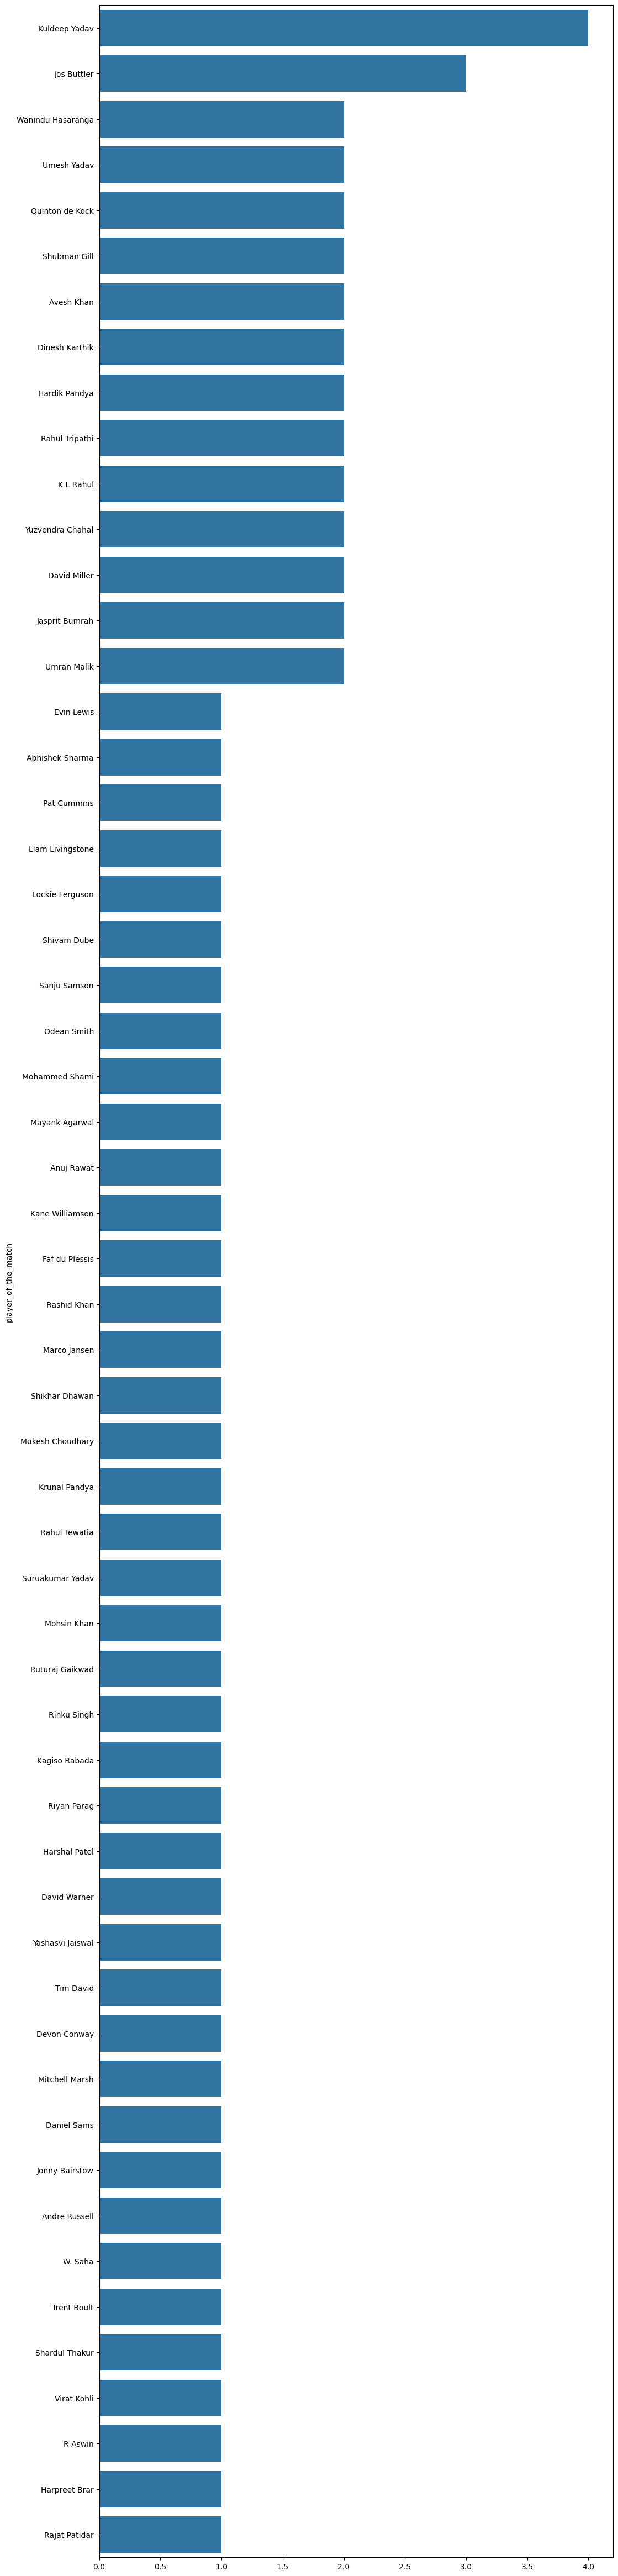

In [35]:
plt.figure(figsize=(12, 60)) 
sns.barplot(y=pom.index,x=pom.values)

In [31]:
pom.idxmax()

'Kuldeep Yadav'

## Top two Scorers

In [36]:
scorer=ipl['top_scorer'].value_counts()

In [37]:
scorer

top_scorer
Jos Buttler            7
Quinton de Kock        5
Liam Livingstone       4
Shubman Gill           4
KL Rahul               4
Ishan Kishan           3
David Warner           3
W. Saha                3
Faf du Plessis         3
Shikhar Dhawan         2
Deepak Hooda           2
MS Dhoni               2
Abhishek Sharma        2
Devon Conway           2
Hardik Pandya          2
Rahul Tripathi         2
Mitchell Marsh         2
Andre Russell          2
Virat Kohli            2
Aiden Markram          1
Pat Cummins            1
Kane Williamson        1
Shivam Dube            1
Suryakumar Yadav       1
Shimron Hetmyer        1
Sherfane Rutherford    1
David Miller           1
Tilak Varma            1
Dinesh Karthik         1
Nitish Rana            1
Riyan Parag            1
Sanju Samson           1
Ruturaj Gaikwad        1
Sai Sudharsan          1
Yashasvi Jaiswal       1
Moeen Ali              1
Rajat Patidar          1
Name: count, dtype: int64

In [59]:
high=ipl.groupby('top_scorer')['highscore'].sum().sort_values(ascending=False)
high

top_scorer
Jos Buttler            651
Quinton de Kock        377
KL Rahul               351
Shubman Gill           288
Faf du Plessis         257
Liam Livingstone       239
David Warner           213
W. Saha                190
Ishan Kishan           180
Shikhar Dhawan         158
Hardik Pandya          154
Mitchell Marsh         152
Rahul Tripathi         147
Devon Conway           143
Virat Kohli            131
Abhishek Sharma        122
Andre Russell          119
Deepak Hooda           114
Rajat Patidar          112
Ruturaj Gaikwad         99
Shivam Dube             95
David Miller            94
Moeen Ali               93
MS Dhoni                86
Yashasvi Jaiswal        68
Suryakumar Yadav        68
Dinesh Karthik          66
Sai Sudharsan           65
Shimron Hetmyer         59
Aiden Markram           57
Kane Williamson         57
Nitish Rana             57
Pat Cummins             56
Riyan Parag             56
Sanju Samson            54
Tilak Varma             51
Sherfane Rutherfo

In [60]:
high.head(2)

top_scorer
Jos Buttler        651
Quinton de Kock    377
Name: highscore, dtype: int64

<Axes: title={'center': 'Man of the Match'}, ylabel='top_scorer'>

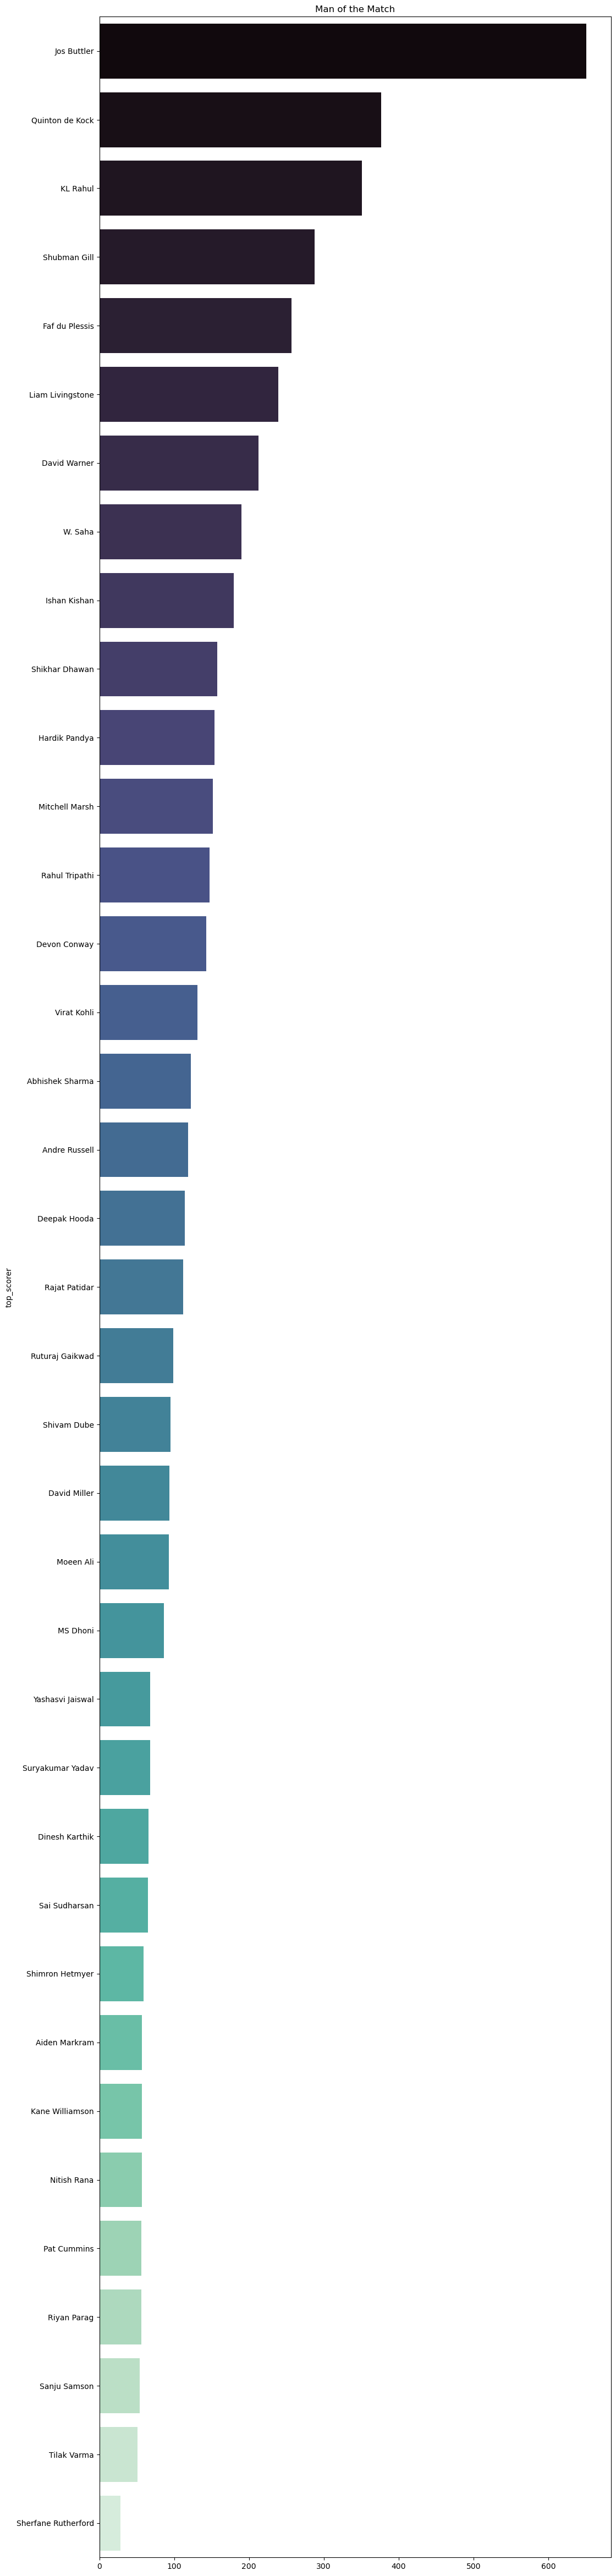

In [61]:
plt.figure(figsize=(12, 60)) 
plt.title("Man of the Match")
sns.barplot(y=high.index,x=high.values,palette='mako')

In [43]:
scorer[0:2]

top_scorer
Jos Buttler        7
Quinton de Kock    5
Name: count, dtype: int64

In [42]:
scorer[0:2].index

Index(['Jos Buttler', 'Quinton de Kock'], dtype='object', name='top_scorer')

## 10 Best Bowling figures 

In [70]:
bowling_fig=ipl['best_bowling_figure'].value_counts()

In [71]:
bowling_fig[0:11]

best_bowling_figure
3--22    5
3--25    3
3--20    3
2--24    3
2--23    3
3--17    2
4--28    2
4--24    2
4--20    2
4--30    2
4--33    2
Name: count, dtype: int64

In [80]:
ipl['highest_wickets']=ipl['best_bowling_figure'].apply(lambda x:x.split('--')[0])
ipl['highest_wickets']=ipl['highest_wickets'].astype(int)


In [81]:
bf=ipl.groupby('best_bowling')['highest_wickets'].sum().sort_values(ascending=False).head(10)

In [82]:
bf

best_bowling
Yuzvendra Chahal     17
Jasprit Bumrah       11
Kuldeep Yadav        11
Rashid Khan          11
Josh Hazlewood       10
Kagiso Rabada        10
Avesh Khan           10
Umran Malik           9
Wanindu Hasaranga     9
T Natarajan           8
Name: highest_wickets, dtype: int64

<Axes: ylabel='best_bowling'>

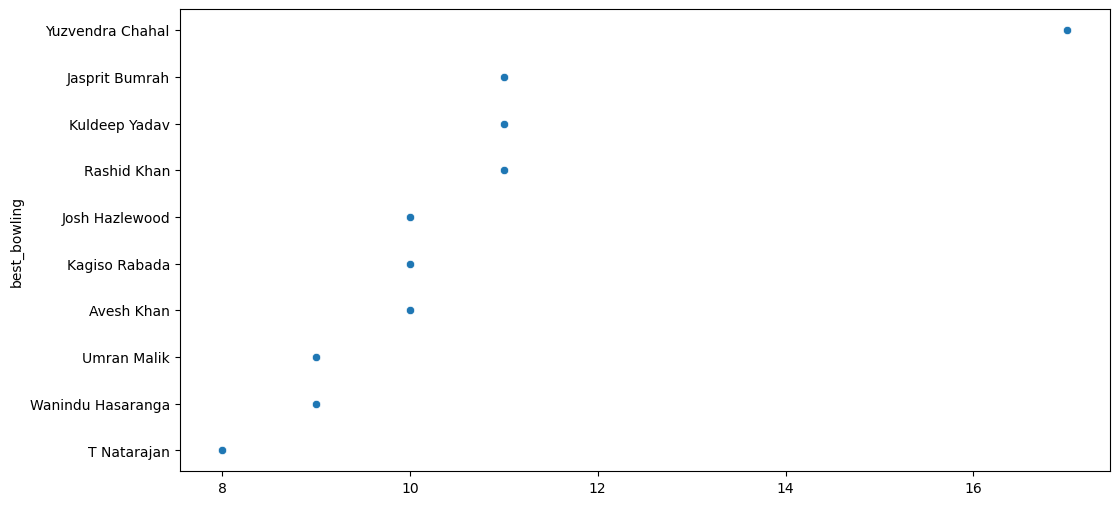

In [86]:
plt.figure(figsize=(12, 6)) 
sns.scatterplot(x=bf.values,y=bf.index)

## Most Match played by venue

In [52]:
venue=ipl['venue'].value_counts()
venue

venue
Wankhede Stadium, Mumbai                        21
Dr DY Patil Sports Academy, Mumbai              20
Brabourne Stadium, Mumbai                       16
Maharashtra Cricket Association Stadium,Pune    13
Eden Gardens, Kolkata                            2
Narendra Modi Stadium, Ahmedabad                 2
Name: count, dtype: int64

In [53]:
venue.idxmax()

'Wankhede Stadium, Mumbai'

## Who won the match by highest margin Through runs

In [90]:
runs=ipl[ipl['won_by']=='Runs'].groupby('top_scorer')['margin'].max().sort_values(ascending=False)
runs

top_scorer
Devon Conway        91
Quinton de Kock     75
Faf du Plessis      67
Shubman Gill        62
Aiden Markram       61
Andre Russell       54
Liam Livingstone    54
Ishan Kishan        52
David Warner        44
Hardik Pandya       37
KL Rahul            36
Riyan Parag         29
Deepak Hooda        24
Shivam Dube         23
Jos Buttler         23
Mitchell Marsh      17
Dinesh Karthik      16
Rajat Patidar       14
Ruturaj Gaikwad     13
Shikhar Dhawan      12
W. Saha              5
Rahul Tripathi       3
Shimron Hetmyer      3
Name: margin, dtype: int64

In [92]:
run_team=ipl[ipl['won_by']=='Runs'].groupby('team1')['margin'].max().sort_values(ascending=False)
run_team

team1
Chennai      91
Kolkata      75
Banglore     67
Lucknow      62
Hyderabad    61
Delhi        44
Gujarat      37
Mumbai       23
Name: margin, dtype: int64

<Axes: xlabel='team1'>

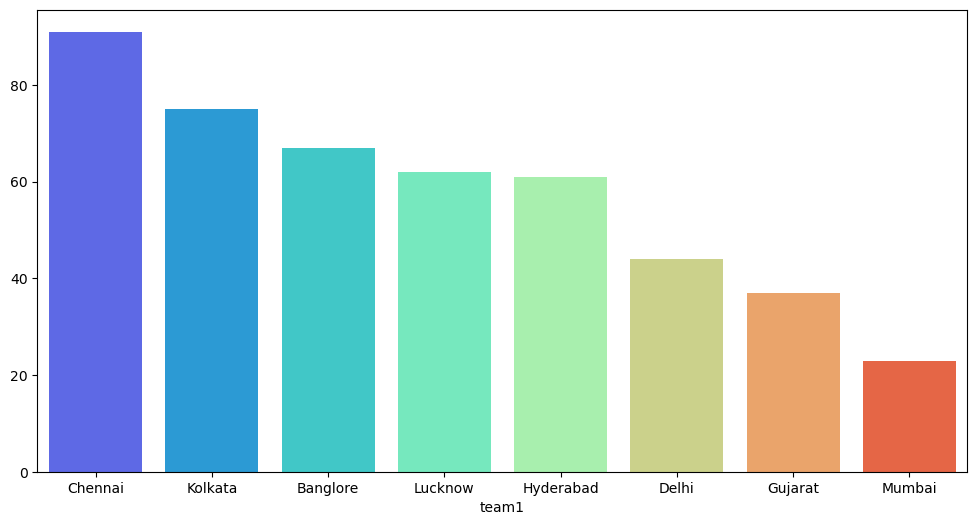

In [93]:
plt.figure(figsize=(12, 6)) 
sns.barplot(x=run_team.index,y=run_team.values,palette='rainbow')